In [3]:
!git clone https://github.com/prakashtewari/Python-VAR.git


Cloning into 'Python-VAR'...
remote: Enumerating objects: 34, done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (34/34), done.


In [4]:
!pip install statsmodels

In [5]:
%cd Python-VAR


/content/Python-VAR


In [6]:
import pandas as pd
import statsmodels.api as sm
# mdata = pd.read_csv("Final_logged_data.csv")
# mdata.head()

#df1 = pd.read_csv('banglore_timeseries.csv')
df1= pd.read_csv('final (4).csv')
df1
# mdata = (df1 + df2)[:23]
mdata = df1[:23] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Exogenous Variables for the model with Lag: 2 
 ['const', 'L1.vaccinated1', 'L1.freq1', 'L2.vaccinated1', 'L2.freq1']
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Jul, 2021
Time:                     08:09:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -7.05737
Nobs:                     21.0000    HQIC:                  -7.44682
Log likelihood:           29.7296    FPE:                0.000533459
AIC:                     -7.55476    Det(Omega_mle):     0.000348011
--------------------------------------------------------------------
Results for equation vaccinated1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.241015         0.107366            2.245           0.025
L1.vaccinated1

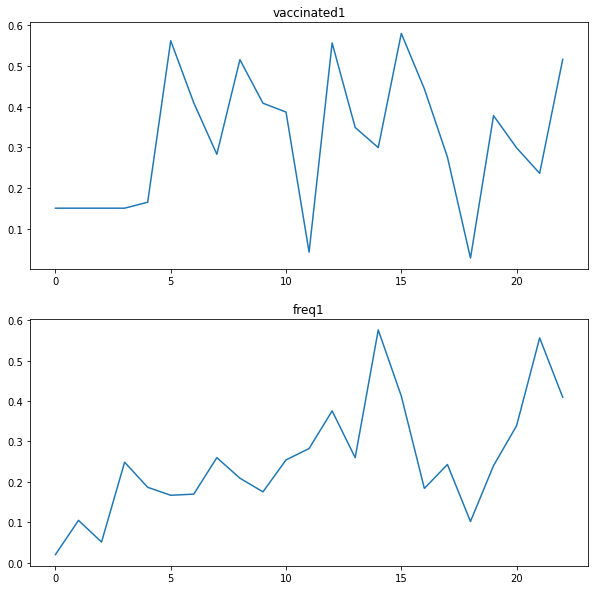

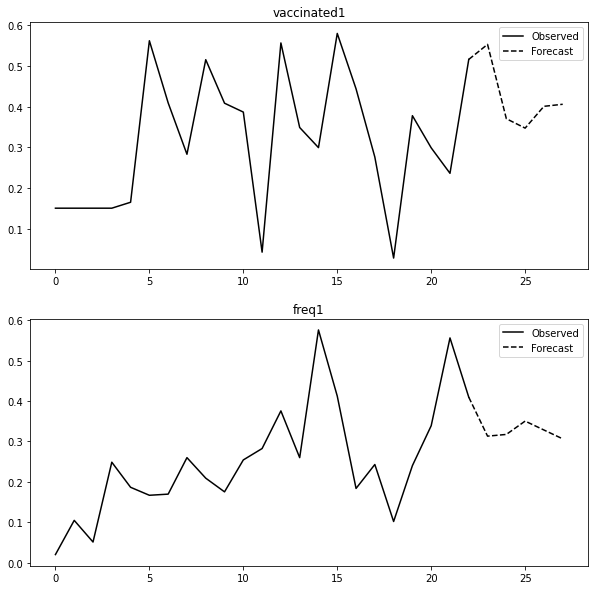

In [7]:
import pandas as pd
from TimeSeries_Tests import *
from statsmodels.tsa.api import VAR, DynamicVAR
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

#########
# Load pre-loaded macroeconomic data from PANDAS
#########

mdata1 = mdata[['freq1','vaccinated1']]
# mdata1.index = pd.DatetimeIndex(quarterly)

"""
a. Take Log difference of the level variables
b. Take differences of the rate variables
"""
mdata1['freq1'] = pd.Series(mdata1['freq1'].dropna())
mdata1['vaccinated1'] = pd.Series(mdata1['vaccinated1'].dropna())

# mdata1['NOM_logdiff'] = pd.Series(mdata1['NOM'].dropna())
# mdata1['HW_logdiff'] = pd.Series(mdata1['HW'].dropna())

"""
a. Drop NA
"""
mdata1.dropna(inplace = True)

"""
a. Prepare modeling dataset
"""
temp_data = pd.DataFrame(mdata1).dropna()
model_data = temp_data[['vaccinated1','freq1']]

# Create VAR models -

def make_var_model(data, lags = 4, actual_plot = False ):
 
    # make a VAR model
    model = VAR(data)
    
    result_dict = {}
    for lag in range(lags, lags+1):
        
        results = model.fit(maxlags = lag)
        print ('Exogenous Variables for the model with Lag: %d \n '%lag+ str(results.exog_names))
        print (results.summary())
        
        if actual_plot ==True:
            results.plot()
            
        fitted_values = results.fittedvalues
        
        lag_order = results.k_ar
        
        forecast_values = pd.DataFrame(data = results.forecast(y= model_data.values[-lag_order:], steps=  5), columns = results.names)
        
        results.forecast_interval(y= model_data.values[-lag_order:], steps = 5)
        results.plot_forecast(steps = 5, plot_stderr = False)
        num_periods = 30
        
        
        result_dict['Lag_Order_{}'.format(lag)] = results

    return result_dict

res  = make_var_model(data = model_data, lags = 2, actual_plot = True )
    

In [ ]:
import pandas as pd
import statsmodels.api as sm
# mdata = pd.read_csv("Final_logged_data.csv")
# mdata.head()

df1 = pd.read_csv('patna_pred.csv')

mdata = (df1 )[:23]
mdata 


,Unnamed: 0,vaccinated1,freq1
0,0,0.151304,0.020772
1,1,0.151304,0.109792
2,2,0.151304,0.053412
3,3,0.151304,0.261128
4,4,0.165829,0.195846
5,5,0.561339,0.175074
6,6,0.409187,0.178042
7,7,0.283363,0.272997
8,8,0.514979,0.219585
9,9,0.408400,0.183976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Exogenous Variables for the model with Lag: 2 
 ['const', 'L1.vaccinated1', 'L1.freq1', 'L2.vaccinated1', 'L2.freq1']
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Jun, 2021
Time:                     13:19:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.95894
Nobs:                     21.0000    HQIC:                  -7.34839
Log likelihood:           28.6961    FPE:                0.000588638
AIC:                     -7.45633    Det(Omega_mle):     0.000384008
--------------------------------------------------------------------
Results for equation vaccinated1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.241015         0.107366            2.245           0.025
L1.vaccinated1

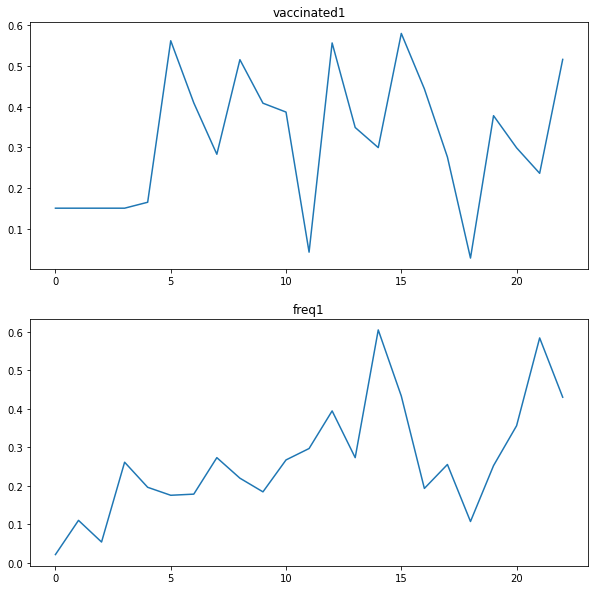

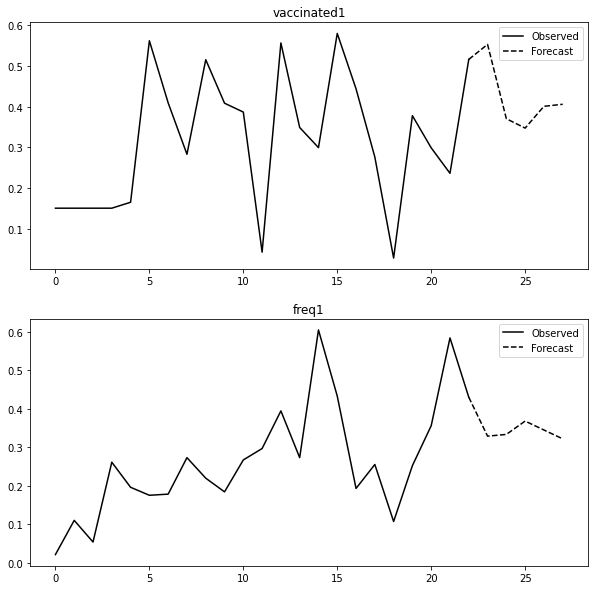

In [ ]:
import pandas as pd
from TimeSeries_Tests import *
from statsmodels.tsa.api import VAR, DynamicVAR
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

#########
# Load pre-loaded macroeconomic data from PANDAS
#########

mdata1 = mdata[['freq1','vaccinated1']]
# mdata1.index = pd.DatetimeIndex(quarterly)

"""
a. Take Log difference of the level variables
b. Take differences of the rate variables
"""
mdata1['freq1'] = pd.Series(mdata1['freq1'].dropna())
mdata1['vaccinated1'] = pd.Series(mdata1['vaccinated1'].dropna())

# mdata1['NOM_logdiff'] = pd.Series(mdata1['NOM'].dropna())
# mdata1['HW_logdiff'] = pd.Series(mdata1['HW'].dropna())

"""
a. Drop NA
"""
mdata1.dropna(inplace = True)

"""
a. Prepare modeling dataset
"""
temp_data = pd.DataFrame(mdata1).dropna()
model_data = temp_data[['vaccinated1','freq1']]

# Create VAR models -

def make_var_model(data, lags = 4, actual_plot = False ):
 
    # make a VAR model
    model = VAR(data)
    
    result_dict = {}
    for lag in range(lags, lags+1):
        
        results = model.fit(maxlags = lag)
        print ('Exogenous Variables for the model with Lag: %d \n '%lag+ str(results.exog_names))
        print (results.summary())
        
        if actual_plot ==True:
            results.plot()
            
        fitted_values = results.fittedvalues
        
        lag_order = results.k_ar
        
        forecast_values = pd.DataFrame(data = results.forecast(y= model_data.values[-lag_order:], steps=  5), columns = results.names)
        
        results.forecast_interval(y= model_data.values[-lag_order:], steps = 5)
        results.plot_forecast(steps = 5, plot_stderr = False)
        num_periods = 30
        
        
        result_dict['Lag_Order_{}'.format(lag)] = results

    return result_dict

res  = make_var_model(data = model_data, lags = 2, actual_plot = True )
    